In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [3]:
train_df = pd.read_csv('../../Data/train.csv')
test_df = pd.read_csv('../../Data/test.csv')

# data overview

In [25]:
print(train_df.shape)
train_df.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [32]:
# target == 1 Case
train_df[train_df.target == 1]['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [33]:
# target == 0 Case
train_df[train_df.target == 0]['text'].values[0]

"What's up man?"

In [34]:
# training label distribution
train_df.groupby('target').count()

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


# Text processing

## Naive text processing

Create features simply by token dictionary.

In [54]:
count_vec = feature_extraction.text.CountVectorizer()
# create token dictionry from training set and represent each text with the dictionary
train_vec = count_vec.fit_transform(train_df['text'])
# using the dictionary from train set to represent each text in test set
test_vec = count_vec.transform(test_df["text"])

In [56]:
print(train_vec.shape)
print(test_vec.shape)

(7613, 21637)
(3263, 21637)


In [61]:
ridge = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(ridge, train_vec, train_df['target'], cv = 3, scoring="f1")
scores

array([0.60387232, 0.57580105, 0.64485082])

In [62]:
ridge.fit(train_vec, train_df["target"])
pred_val = ridge.predict(test_vec)

# Thoughts on feature engineering

## High level features

* Number of words
* Number of characters
* Average number of characters of each word

### Number of words

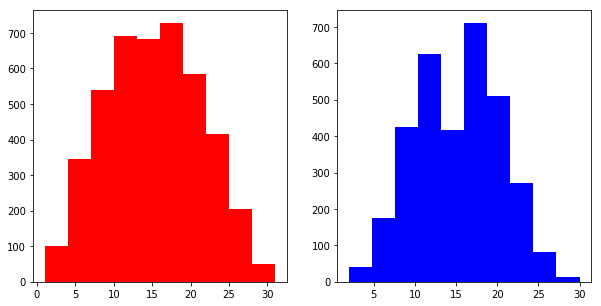

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x)), color = 'red')
ax2.hist(train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x)), color = 'blue')
plt.show()

### Number of characters

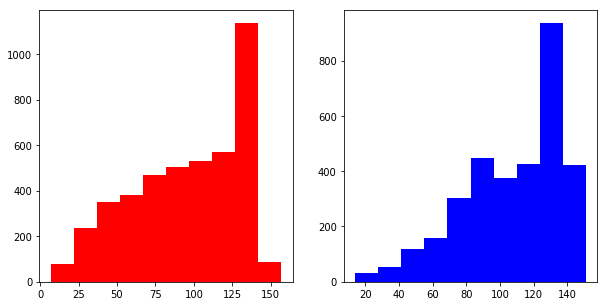

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(train_df[train_df['target']==0]['text'].str.len(), color = 'red')
ax2.hist(train_df[train_df['target']==1]['text'].str.len(), color = 'blue')
plt.show()

### Average number of characters of each word

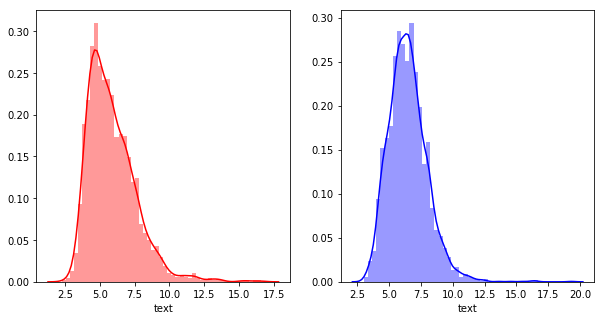

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(train_df[train_df['target']==0]['text'].str.split().map(lambda x:np.mean([len(i) for i in x])),\
             ax = ax1, \
             color = 'red')
sns.distplot(train_df[train_df['target']==1]['text'].str.split().map(lambda x:np.mean([len(i) for i in x])), \
             ax = ax2, \
             color = 'blue')
plt.show()

## Words exploration

### Stop words distribution

In [88]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [103]:
def stop_dict(target):
    dic = {}
    for i in train_df[train_df['target']==target]['text'].str.split():
        for j in i:
            if j in stop:
                dic[j] = dic.get(j, 0)+1
    return dic

In [104]:
stop_dic_0 = stop_dict(0)
stop_dic_1 = stop_dict(1)

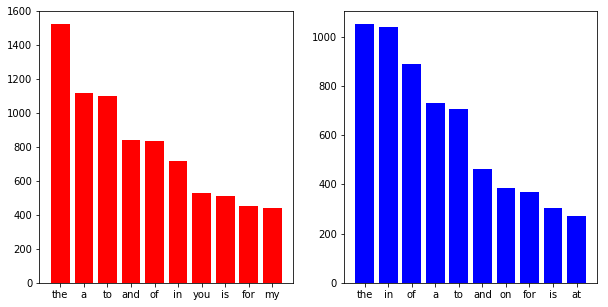

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
x, y = zip(*sorted(stop_dic_0.items(), key=lambda x:x[1], reverse=True)[:10])
ax1.bar(x, y, color = 'red')
x, y = zip(*sorted(stop_dic_1.items(), key=lambda x:x[1], reverse=True)[:10])
ax2.bar(x, y, color = 'blue')
plt.show()